# Interactive Colormap Explorer

This notebook demonstrates the interactive colormap widget for exploring different colorbar normalizations and discrete colormaps based on data distribution.

Perfect for understanding how to optimize colorbars for oceanographic data with non-uniform distributions (like salinity with concentrated values and long tails).

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import the interactive colormap widget
from oceanvis_py.plots.widgets import create_colormap_widget, InteractiveColormapWidget

In [2]:
# Load the M212 towyo data
data_path = Path.cwd().parent / "data" / "m212_072_towyo_interpolated.nc"
ds = xr.open_dataset(data_path)

print("M212 Towyo Dataset loaded:")
print(f"Variables: {list(ds.data_vars.keys())}")
print(f"Dimensions: {dict(ds.dims)}")
print(f"\nFocusing on SA (Absolute Salinity) and CT (Conservative Temperature)")
print(f"SA range: {ds.SA.min().values:.3f} to {ds.SA.max().values:.3f}")
print(f"CT range: {ds.CT.min().values:.3f} to {ds.CT.max().values:.3f}")

M212 Towyo Dataset loaded:
Variables: ['CT', 'SA', 'sigma2', 'temperature', 'salinity', 'conductivity', 'latitude', 'longitude', 'waterdepth', 'u_velocity', 'v_velocity']
Dimensions: {'pressure': 278, 'distance': 100}

Focusing on SA (Absolute Salinity) and CT (Conservative Temperature)
SA range: 35.040 to 35.086
CT range: 2.697 to 3.727


/var/folders/t1/z5bp59k95119nw35yqv699t40000gn/T/ipykernel_86445/2430512832.py:7: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Dimensions: {dict(ds.dims)}")


## Salinity Distribution Analysis

Let's look at the salinity data distribution first to understand why we need non-linear colorbars.

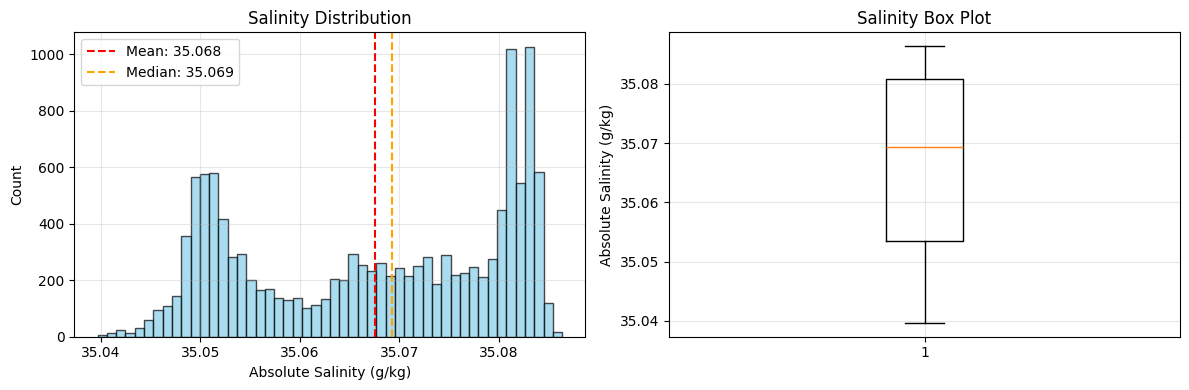

Salinity range: 35.040 to 35.086
25th percentile: 35.054
75th percentile: 35.081
90% of data lies between: 35.049 and 35.084


In [3]:
# Examine salinity distribution
sa_data = ds.SA.values.flatten()
sa_clean = sa_data[~np.isnan(sa_data)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
ax1.hist(sa_clean, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(sa_clean.mean(), color='red', linestyle='--', label=f'Mean: {sa_clean.mean():.3f}')
ax1.axvline(np.median(sa_clean), color='orange', linestyle='--', label=f'Median: {np.median(sa_clean):.3f}')
ax1.set_xlabel('Absolute Salinity (g/kg)')
ax1.set_ylabel('Count')
ax1.set_title('Salinity Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(sa_clean, vert=True)
ax2.set_ylabel('Absolute Salinity (g/kg)')
ax2.set_title('Salinity Box Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Salinity range: {sa_clean.min():.3f} to {sa_clean.max():.3f}")
print(f"25th percentile: {np.percentile(sa_clean, 25):.3f}")
print(f"75th percentile: {np.percentile(sa_clean, 75):.3f}")
print(f"90% of data lies between: {np.percentile(sa_clean, 5):.3f} and {np.percentile(sa_clean, 95):.3f}")

## Interactive Salinity (SA) Colormap Explorer - Primary Test Case

Use the widget below to explore different colormap strategies for **Absolute Salinity (SA)** data from M212 towyo. 

SA is the **trickiest case** because the data are highly concentrated within a narrow range with long tails - this is perfect for demonstrating the power of nonlinear colorbar normalization.

Notice how:
- **Linear**: Wastes color resolution on sparse tails (poor choice)
- **Percentile**: Better resolution in concentrated areas 
- **Compressed Percentile**: Even better for focusing on the main distribution (optimal for SA)

The SAL colormap uses your custom blue-to-pale yellow scheme specifically designed for salinity data.

Try different numbers of levels (10-20 is usually optimal) and compare methods:

In [4]:
# Create interactive widget for SA (Absolute Salinity) - Primary Test Case
salinity_widget = create_colormap_widget(ds.SA, 'Absolute Salinity (g/kg)')

# Set default to SAL colormap if available
try:
    from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS
    if 'SAL' in CUSTOM_COLORMAPS:
        salinity_widget.colormap_dropdown.value = 'SAL'
        print("Using your custom SAL colormap (blue to pale yellow for salinity)")
except ImportError:
    print("Using default colormap")

salinity_widget.display()

Using your custom SAL colormap (blue to pale yellow for salinity)


In [5]:
# Create interactive widget for CT (Conservative Temperature) - Secondary Test Case
temp_widget = create_colormap_widget(ds.CT, 'Conservative Temperature (°C)')

# Set default to TEMP2 colormap if available
try:
    from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS
    if 'TEMP2' in CUSTOM_COLORMAPS:
        temp_widget.colormap_dropdown.value = 'TEMP2'
        print("Using your custom TEMP2 colormap (blue to red thermal scale)")
except ImportError:
    print("Using default colormap")

temp_widget.display()

Using your custom TEMP2 colormap (blue to red thermal scale)


In [6]:
# Create interactive widget for CT (Conservative Temperature) - Secondary Test Case
temp_widget = create_colormap_widget(ds.CT, 'Conservative Temperature (°C)')

# Set default to TEMP2 colormap if available
try:
    from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS
    if 'TEMP2' in CUSTOM_COLORMAPS:
        temp_widget.colormap_dropdown.value = 'TEMP2'
        print("Using your custom TEMP2 colormap (blue to red thermal scale)")
except ImportError:
    print("Using default colormap")

temp_widget.display()

Using your custom TEMP2 colormap (blue to red thermal scale)


## Additional Colormaps Available

You now have access to your complete custom colormap collection from MATLAB. Try switching between these options in the widgets above:

**Your Custom Colormaps:**
- **SAL** - Blue to pale yellow (perfect for salinity)
- **TEMP2** - Blue to red thermal scale (your preferred temperature colormap)
- **POLAR** - Red to blue through white (perfect for velocity/anomalies - symmetric around zero!)
- **TEMP** - Original temperature colormap
- **TOPO** - For bathymetry (brown to blue-green)
- **OXY** - For oxygen data
- **PurGre** - Purple to green (versatile divergent colormap)
- **CHL** - Greens for chlorophyll
- **Y2R** - Yellow to red
- **BLUE** - Blues to whites
- **CAT** - Categorical colors

**New Normalization Method:**
- **Symmetric Around Zero** - Creates perfectly symmetric levels for velocity, anomalies, or any data that should be centered at zero

**Tips for the M212 Towyo Data:**
- **SA** (concentrated around 35.0 g/kg) - use **percentile** or **compressed percentile** methods
- **CT** (broader range) - **linear** or **percentile** methods work well
- **U-velocity** (positive/negative values) - use **symmetric_zero** method with **POLAR** colormap
- Try 10-20 discrete levels for optimal visualization
- Use **extend='both'** if data exceeds your chosen range

## Applying Custom Colormap to Section Plots

Once you've found a good colormap configuration, use the "Generate Code" button to get copy-paste code.
Here's an example of how to apply a custom discrete colormap to section plots:

In [7]:
# Demonstrate using plot_section with real M212 data and manual colorbar updates

from oceanvis_py.plots import plot_section
from oceanvis_py.plots.widgets import calculate_histogram_levels
from matplotlib.colors import ListedColormap, BoundaryNorm

print("=== Testing plot_section with M212 Towyo Data ===")
print(f"Dataset variables: {list(ds.data_vars.keys())}")
print(f"SA range: {ds.SA.min().values:.3f} to {ds.SA.max().values:.3f}")
print(f"CT range: {ds.CT.min().values:.3f} to {ds.CT.max().values:.3f}")
print(f"U-velocity range: {ds.u_velocity.min().values:.3f} to {ds.u_velocity.max().values:.3f}")

# Example 1: Salinity with custom SAL colormap
print("\n1. Creating salinity section with custom SAL colormap...")

# Calculate optimal levels for SA data
sa_clean = ds.SA.values[~np.isnan(ds.SA.values)]
sa_levels = calculate_histogram_levels(sa_clean, n_levels=15, method='percentile')

# Create discrete SAL colormap
from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS
sal_cmap = CUSTOM_COLORMAPS['SAL']
discrete_sal_cmap = ListedColormap(sal_cmap(np.linspace(0, 1, 15)))
sal_norm = BoundaryNorm(sa_levels, 15, extend='neither')

print(f"SA levels: {sa_levels}")
print(f"Using {len(sa_levels)} boundaries for {len(sa_levels)-1} color intervals")

# This demonstrates the workflow:
# 1. Use interactive widget to find optimal levels and colormap
# 2. Apply those settings to plot_section manually

=== Testing plot_section with M212 Towyo Data ===
Dataset variables: ['CT', 'SA', 'sigma2', 'temperature', 'salinity', 'conductivity', 'latitude', 'longitude', 'waterdepth', 'u_velocity', 'v_velocity']
SA range: 35.040 to 35.086
CT range: 2.697 to 3.727
U-velocity range: -0.352 to 0.134

1. Creating salinity section with custom SAL colormap...
SA levels: [35.04  35.043 35.046 35.049 35.052 35.055 35.058 35.061 35.065 35.068
 35.071 35.074 35.077 35.08  35.083 35.086]
Using 16 boundaries for 15 color intervals


=== 1. SALINITY SECTION (SA) with SAL Colormap ===
SA range: 35.040 to 35.086
Using 16 boundaries: [35.04  35.043 35.046 35.049 35.052 35.055 35.058 35.061 35.065 35.068
 35.071 35.074 35.077 35.08  35.083 35.086]


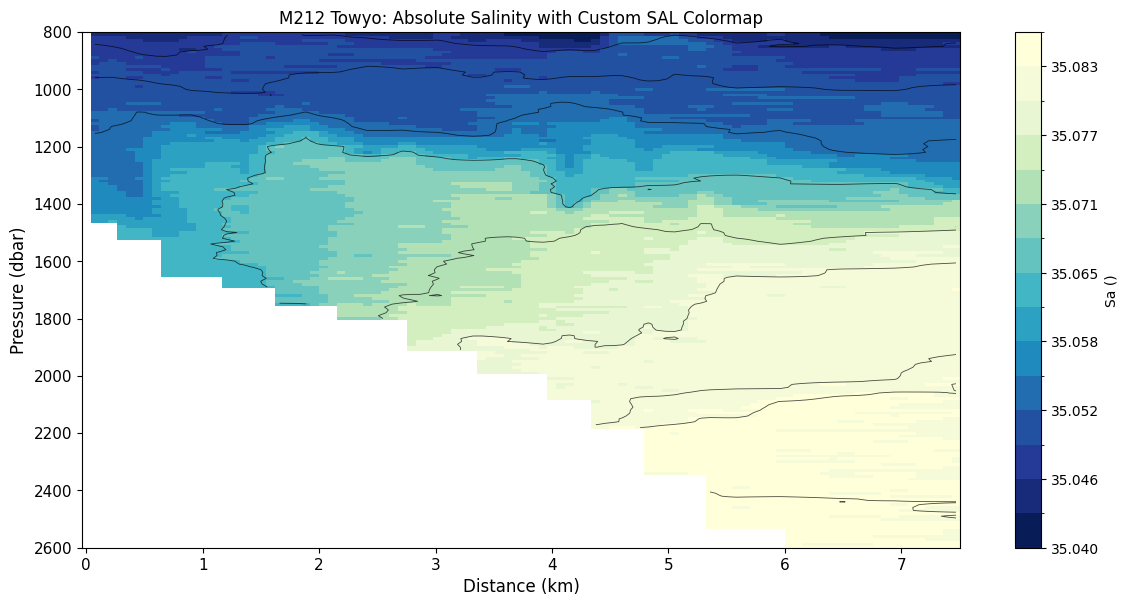

In [8]:
# Example 1: Salinity Section Plot with SAL Colormap
from oceanvis_py.plots import plot_section
from oceanvis_py.plots.widgets import calculate_histogram_levels
from matplotlib.colors import ListedColormap, BoundaryNorm
from oceanvis_py.core.custom_colormaps import CUSTOM_COLORMAPS

print("=== 1. SALINITY SECTION (SA) with SAL Colormap ===")

# Calculate optimal levels for SA data using percentile method
sa_clean = ds.SA.values[~np.isnan(ds.SA.values)]
sa_levels = calculate_histogram_levels(sa_clean, n_levels=15, method='percentile')

# Create discrete SAL colormap
sal_cmap = CUSTOM_COLORMAPS['SAL']
discrete_sal_cmap = ListedColormap(sal_cmap(np.linspace(0, 1, 15)))
sal_norm = BoundaryNorm(sa_levels, 15, extend='neither')

print(f"SA range: {ds.SA.min().values:.3f} to {ds.SA.max().values:.3f}")
print(f"Using {len(sa_levels)} boundaries: {sa_levels}")

# Create salinity section plot
fig, ax = plot_section(
    ds,
    variable='SA',
    x_coord='distance',
    y_coord='pressure',
    colormap=discrete_sal_cmap,
    norm=sal_norm,
    sigma2_contours=True,
    figsize=(12, 6)
)
ax.set_title('M212 Towyo: Absolute Salinity with Custom SAL Colormap')
plt.show()


=== 4. SALINITY SECTION using Saved CPT File ===
This demonstrates the complete workflow:
1. Use interactive widget above to find optimal settings
2. Click 'Generate CPT' button to save .cpt file
3. Use the .cpt file directly in plot_section

✅ Using saved CPT file: salt.cpt
✅ Using CPT file: ../oceanvis_py/config/saved_colormaps/salt.cpt
📊 13 level boundaries from 35.03 to 35.095


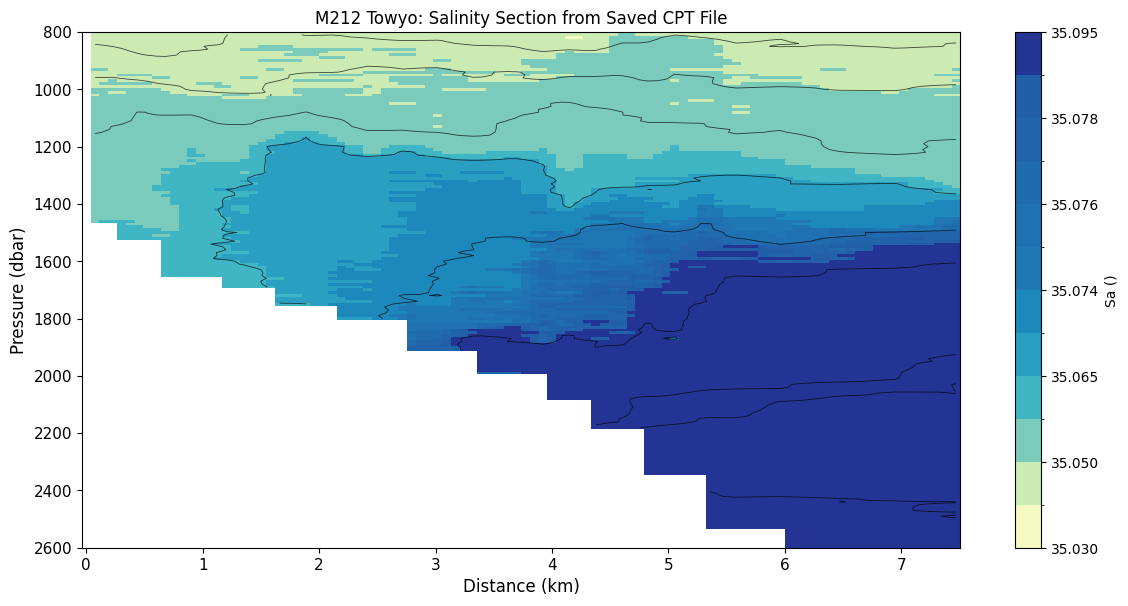


🎯 This method provides:
   • Exact reproducibility of colormap settings
   • Easy sharing between matplotlib and PyGMT
   • No need to recreate BoundaryNorm objects
   • Direct integration of interactive widget results


In [9]:
# Example 4: Salinity Section using Saved CPT File (Complete Workflow)

print("\n=== 4. SALINITY SECTION using Saved CPT File ===")
print("This demonstrates the complete workflow:")
print("1. Use interactive widget above to find optimal settings")
print("2. Click 'Generate CPT' button to save .cpt file")
print("3. Use the .cpt file directly in plot_section")

# Path to a saved CPT file (generated from the interactive widget)
cpt_file_path = "../oceanvis_py/config/saved_colormaps/salt.cpt"

# Check if CPT file exists
from pathlib import Path
if Path(cpt_file_path).exists():
    print(f"\n✅ Using saved CPT file: {Path(cpt_file_path).name}")

    # Create section plot using the CPT file directly
    fig, ax = plot_section(
        ds,
        variable='SA',
        x_coord='distance',
        y_coord='pressure',
        cpt_file=cpt_file_path,  # This is the key difference!
        sigma2_contours=True,
        figsize=(12, 6)
    )
    ax.set_title('M212 Towyo: Salinity Section from Saved CPT File')
    plt.show()

    print("\n🎯 This method provides:")
    print("   • Exact reproducibility of colormap settings")
    print("   • Easy sharing between matplotlib and PyGMT")
    print("   • No need to recreate BoundaryNorm objects")
    print("   • Direct integration of interactive widget results")

else:
    print(f"\n⚠️ CPT file not found at: {cpt_file_path}")
    print("   Use the salinity widget above and click 'Generate CPT' to create one!")
    print("   Then re-run this cell.")


=== 3. VELOCITY SECTION (U-velocity) with POLAR Colormap ===
U-velocity range: -0.352 to 0.134
Using symmetric levels: [-0.35 -0.3  -0.26 -0.21 -0.16 -0.12 -0.07 -0.02  0.02  0.07  0.12  0.16
  0.21  0.26  0.3   0.35]
Zero-centered: True


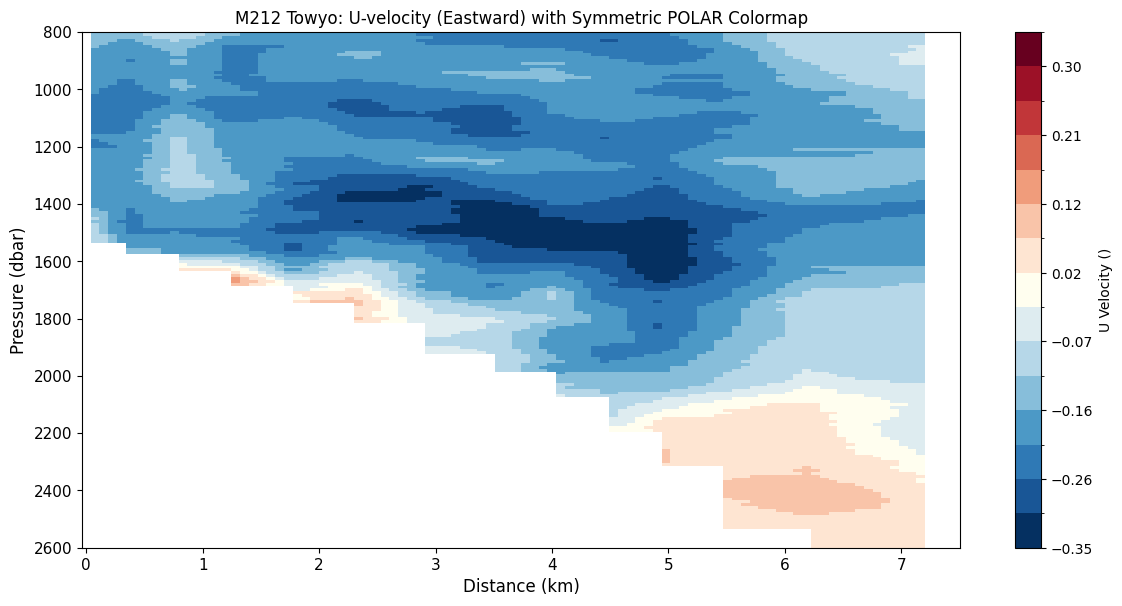

In [10]:
# Example 3: Velocity Section Plot with POLAR Colormap (Symmetric)

print("\n=== 3. VELOCITY SECTION (U-velocity) with POLAR Colormap ===")

# Calculate symmetric levels for velocity data
u_vel_clean = ds.u_velocity.values[~np.isnan(ds.u_velocity.values)]
u_vel_levels = calculate_histogram_levels(u_vel_clean, n_levels=15, method='symmetric_zero')

# Create discrete POLAR colormap (perfect for symmetric data around zero)
polar_cmap = CUSTOM_COLORMAPS['POLAR']
discrete_polar_cmap = ListedColormap(polar_cmap(np.linspace(0, 1, 15)))
polar_norm = BoundaryNorm(u_vel_levels, 15, extend='neither')

print(f"U-velocity range: {ds.u_velocity.min().values:.3f} to {ds.u_velocity.max().values:.3f}")
print(f"Using symmetric levels: {u_vel_levels}")
print(f"Zero-centered: {np.allclose(u_vel_levels, -u_vel_levels[::-1], atol=1e-10)}")

# Create velocity section plot
fig, ax = plot_section(
    ds,
    variable='u_velocity',
    x_coord='distance',
    y_coord='pressure',
    colormap=discrete_polar_cmap,
    norm=polar_norm,
    sigma2_contours=False,  # Skip density contours for velocity
    figsize=(12, 6)
)
ax.set_title('M212 Towyo: U-velocity (Eastward) with Symmetric POLAR Colormap')
plt.show()


=== 2. TEMPERATURE SECTION (CT) with TEMP2 Colormap ===
CT range: 2.697 to 3.727
Using 16 boundaries: [2.7  2.79 2.89 3.07 3.14 3.21 3.26 3.3  3.34 3.36 3.38 3.41 3.47 3.53
 3.61 3.73]


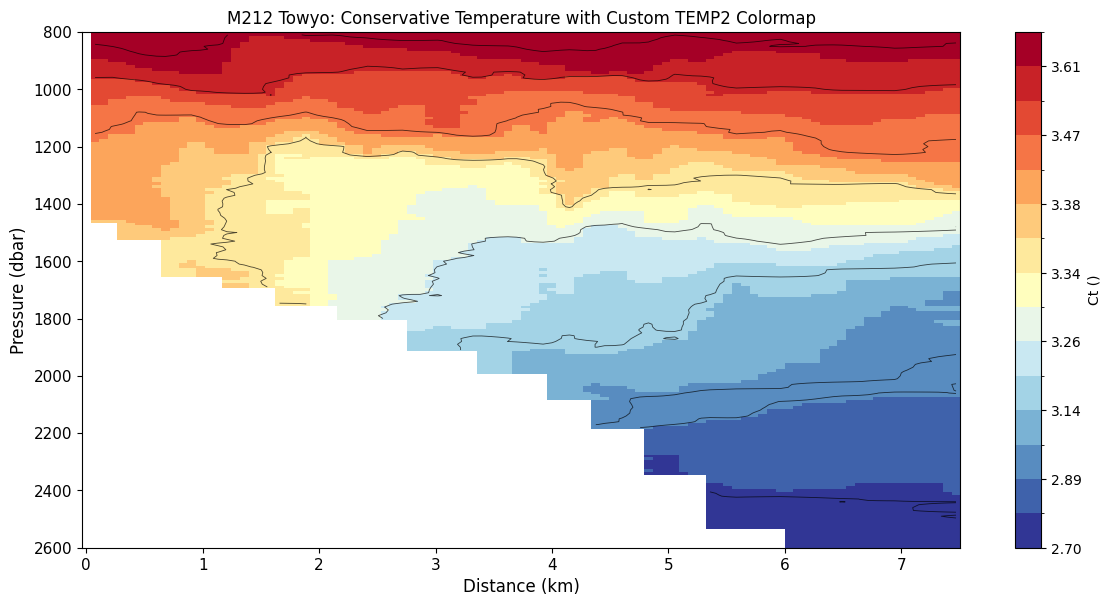

In [11]:
# Example 2: Temperature Section Plot with TEMP2 Colormap

print("\n=== 2. TEMPERATURE SECTION (CT) with TEMP2 Colormap ===")

# Calculate optimal levels for CT data using percentile method
ct_clean = ds.CT.values[~np.isnan(ds.CT.values)]
ct_levels = calculate_histogram_levels(ct_clean, n_levels=15, method='percentile')

# Create discrete TEMP2 colormap
temp2_cmap = CUSTOM_COLORMAPS['TEMP2']
discrete_temp2_cmap = ListedColormap(temp2_cmap(np.linspace(0, 1, 15)))
temp2_norm = BoundaryNorm(ct_levels, 15, extend='neither')

print(f"CT range: {ds.CT.min().values:.3f} to {ds.CT.max().values:.3f}")
print(f"Using {len(ct_levels)} boundaries: {ct_levels}")

# Create temperature section plot
fig, ax = plot_section(
    ds,
    variable='CT',
    x_coord='distance',
    y_coord='pressure',
    colormap=discrete_temp2_cmap,
    norm=temp2_norm,
    sigma2_contours=True,
    figsize=(12, 6)
)
ax.set_title('M212 Towyo: Conservative Temperature with Custom TEMP2 Colormap')
plt.show()